In [1]:
## The FS neuron undergoes bifurcations as the size of the current step is increased
# Here I try to plot the bifurcation diagram...

# For step current between 1 to 25
# get steady-state frequencies and plot them. 
# Lines representing the transitions are useful to visualise.


import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections as mc
import pandas as pd
from AQUA_class import AQUA
from plotting_functions import *
from bifurcation_sim import *

In [2]:
# The whole program is setup to run with bifurcation_simulation

df = bifurcation_simulation()
print(df)

print(df[df['I_inj'] == 7.0])


c:\Users\liamm\Documents\PhD_autapses\Programming_files\bifurcation_sim.py:72: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, temp_df])


    I_inj  frequency
0     4.0    23.1054
0     4.5    28.7936
0     5.0    32.4781
0     5.5    35.3982
0     6.0    37.8501
..    ...        ...
0    23.0   249.3766
0    23.5   255.7545
0    24.0   261.7801
0    24.5   267.3797
0    25.0   272.4796

[310 rows x 2 columns]
   I_inj  frequency
0    7.0    42.7168
0    7.0    81.1030
0    7.0    81.1688
0    7.0    81.2348
0    7.0    81.3008
0    7.0    81.3670


[[(4.0, 23.1054), (4.5, 28.7936)], [(4.5, 28.7936), (5.0, 32.4781)], [(5.0, 32.4781), (5.5, 35.3982)], [(5.5, 35.3982), (6.0, 37.8501)], [(6.0, 37.8501), (6.5, 40.3551)], [(6.0, 37.8501), (6.5, 40.3714)], [(6.5, 40.3551), (7.0, 42.7168)], [(6.5, 40.3551), (7.0, 81.103)], [(6.5, 40.3551), (7.0, 81.1688)], [(6.5, 40.3551), (7.0, 81.2348)], [(6.5, 40.3551), (7.0, 81.3008)], [(6.5, 40.3551), (7.0, 81.367)], [(6.5, 40.3714), (7.0, 42.7168)], [(6.5, 40.3714), (7.0, 81.103)], [(6.5, 40.3714), (7.0, 81.1688)], [(6.5, 40.3714), (7.0, 81.2348)], [(6.5, 40.3714), (7.0, 81.3008)], [(6.5, 40.3714), (7.0, 81.367)], [(7.0, 42.7168), (7.5, 45.0653)], [(7.0, 42.7168), (7.5, 45.0857)], [(7.0, 42.7168), (7.5, 95.3289)], [(7.0, 42.7168), (7.5, 95.4198)], [(7.0, 42.7168), (7.5, 95.511)], [(7.0, 42.7168), (7.5, 95.6023)], [(7.0, 81.103), (7.5, 45.0653)], [(7.0, 81.103), (7.5, 45.0857)], [(7.0, 81.103), (7.5, 95.3289)], [(7.0, 81.103), (7.5, 95.4198)], [(7.0, 81.103), (7.5, 95.511)], [(7.0, 81.103), (7.5, 95

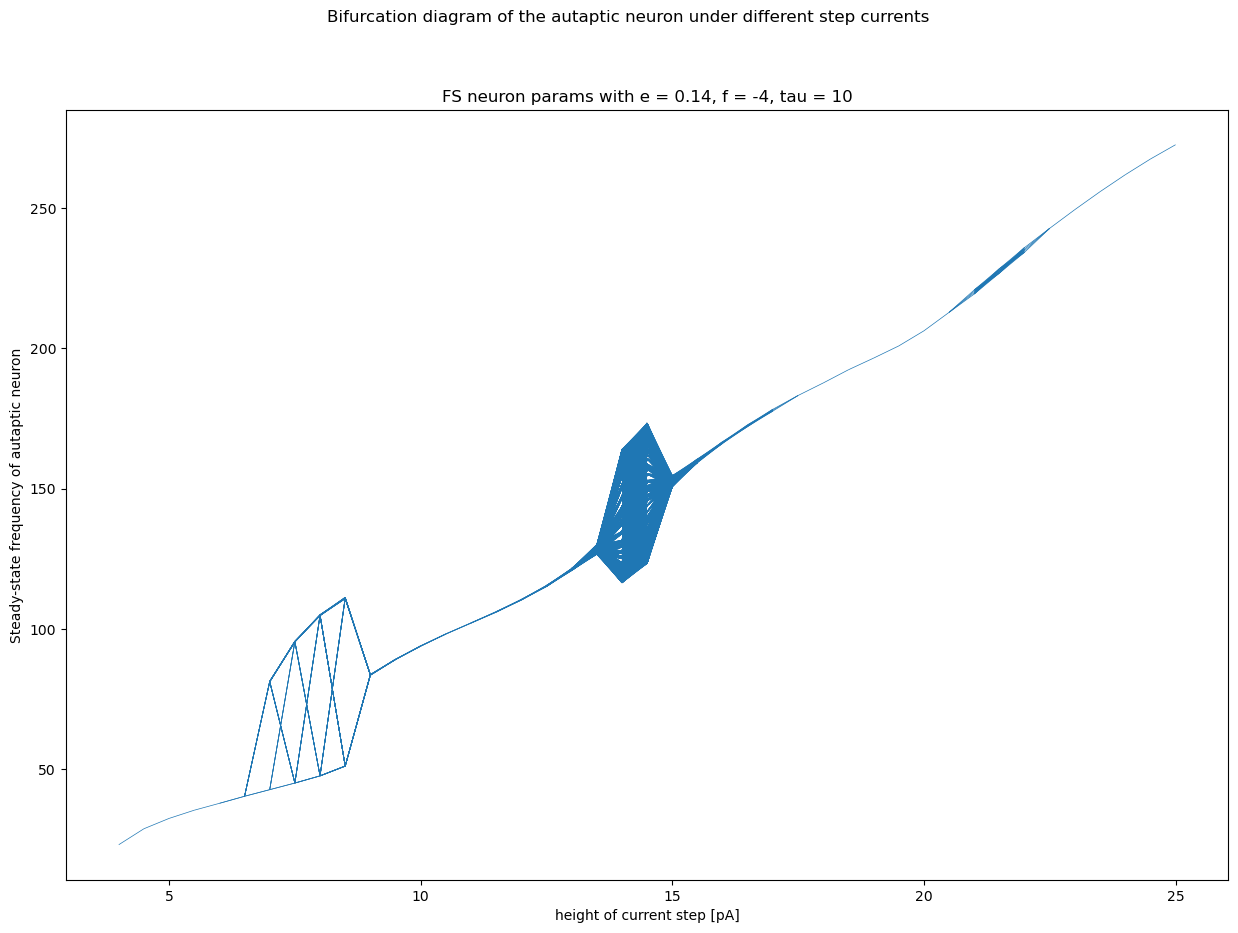

In [3]:
# Can plot the bifurcation diagram using linesegments
# format: [[(x1, y1), (x2, y2)], [(x2, y2), (x3, y3)], ....]
# Want to connect points between adjacent current steps.
# 
segments = []
I_inj = df['I_inj'].unique()
I_inj = np.delete(I_inj, obj = -1)
for i in I_inj:
    freq = df[df['I_inj'] == i]['frequency'].unique()
    for f in freq:
        point1 = (i, f)
        freq2 = df[df['I_inj'] == i+0.5]['frequency'].unique()
        for f2 in freq2:
            point2 = (i+0.5, f2)
            segments.append([point1, point2])

print(segments)

lc = mc.LineCollection(segments, linewidths = 0.5)
fig, ax = plt.subplots(figsize = (15, 10))
ax.add_collection(lc)
ax.autoscale()

fig.suptitle("Bifurcation diagram of the autaptic neuron under different step currents")
ax.set_title("FS neuron params with e = 0.14, f = -4, tau = 10")
ax.set_xlabel("height of current step [pA]")
ax.set_ylabel("Steady-state frequency of autaptic neuron")

plt.savefig(".\\Nov-2024_plots\\inhib_bifurcation_diagram.png")




[[(12.0, 110.2536), (12.5, 115.0748)], [(12.0, 110.2536), (12.5, 115.2074)], [(12.0, 110.2536), (12.5, 115.3403)], [(12.0, 110.2536), (12.5, 115.4734)], [(12.0, 110.3753), (12.5, 115.0748)], [(12.0, 110.3753), (12.5, 115.2074)], [(12.0, 110.3753), (12.5, 115.3403)], [(12.0, 110.3753), (12.5, 115.4734)], [(12.0, 110.4972), (12.5, 115.0748)], [(12.0, 110.4972), (12.5, 115.2074)], [(12.0, 110.4972), (12.5, 115.3403)], [(12.0, 110.4972), (12.5, 115.4734)], [(12.5, 115.0748), (13.0, 120.7729)], [(12.5, 115.0748), (13.0, 120.919)], [(12.5, 115.0748), (13.0, 121.0654)], [(12.5, 115.0748), (13.0, 121.2121)], [(12.5, 115.0748), (13.0, 121.3592)], [(12.5, 115.0748), (13.0, 121.5067)], [(12.5, 115.2074), (13.0, 120.7729)], [(12.5, 115.2074), (13.0, 120.919)], [(12.5, 115.2074), (13.0, 121.0654)], [(12.5, 115.2074), (13.0, 121.2121)], [(12.5, 115.2074), (13.0, 121.3592)], [(12.5, 115.2074), (13.0, 121.5067)], [(12.5, 115.3403), (13.0, 120.7729)], [(12.5, 115.3403), (13.0, 120.919)], [(12.5, 115.34

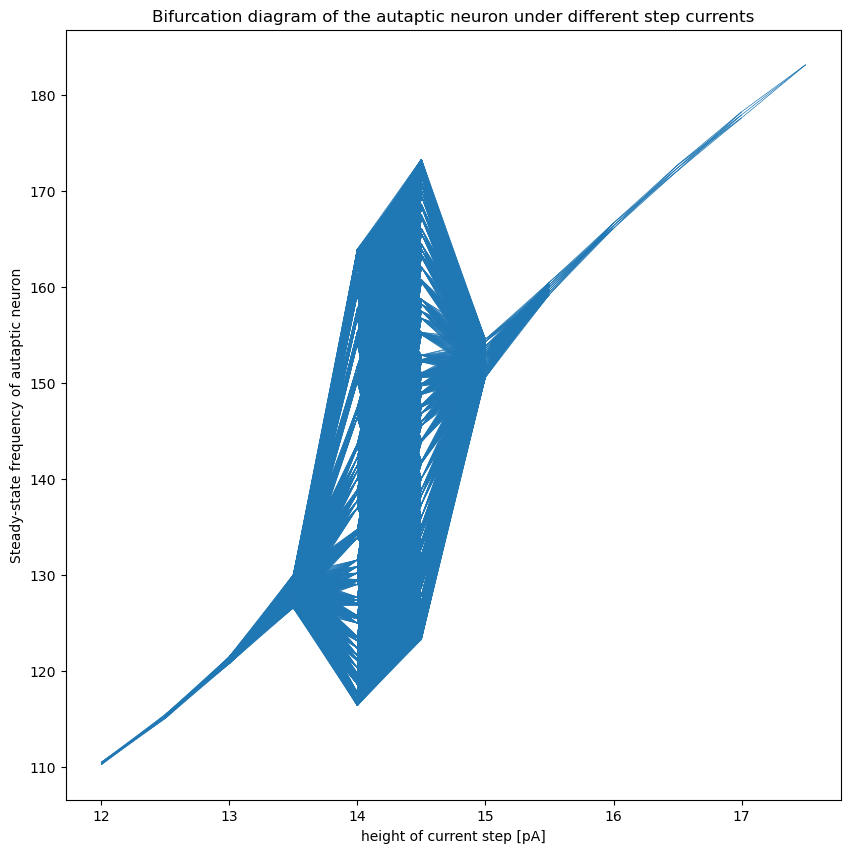

In [4]:
segments = []
I_inj = np.arange(12.0, 17.5, 0.5)

for i in I_inj:
    freq = df[df['I_inj'] == i]['frequency'].unique()
    for f in freq:
        point1 = (i, f)
        freq2 = df[df['I_inj'] == i+0.5]['frequency'].unique()
        for f2 in freq2:
            point2 = (i+0.5, f2)
            segments.append([point1, point2])

print(segments)

lc = mc.LineCollection(segments, linewidths = 0.5)
fig, ax = plt.subplots(figsize = (10, 10))
ax.add_collection(lc)
ax.autoscale()

ax.set_title("Bifurcation diagram of the autaptic neuron under different step currents")
ax.set_xlabel("height of current step [pA]")
ax.set_ylabel("Steady-state frequency of autaptic neuron")
plt.savefig(".\\Nov-2024_plots\\bifurcation_diagram_inset12-17.png")